In [474]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
!pip install scikit-learn


In [476]:
df = pd.read_csv(r"C:\Users\Komal\Downloads\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [477]:
# df.iloc[rows,columns]
# df.iloc[start:stop:step,start:stop:step]
df=df.iloc[:,0:]

In [478]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
337,15612465,Male,35,79000,0
62,15595135,Female,23,66000,0
53,15671655,Female,35,23000,0
110,15665416,Female,39,71000,0
391,15592570,Male,47,23000,1


In [479]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['User ID','Purchased'], axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((280, 3), (120, 3))

In [480]:
X_train.head()

,Gender,Age,EstimatedSalary
157,Male,29,75000
109,Female,38,80000
17,Male,45,26000
347,Female,54,108000
24,Male,46,23000


In [481]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
X_train = X_train.drop('Gender',axis = 1)
X_test = X_test.drop('Gender',axis = 1)

X_train_scaled = scaler.fit_transform(X_train)
# (X-u)/std

# transform train and test sets
# X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [482]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [483]:
X_test_scaled.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [484]:
X_train

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [485]:
X_train_scaled

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [486]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [487]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [488]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


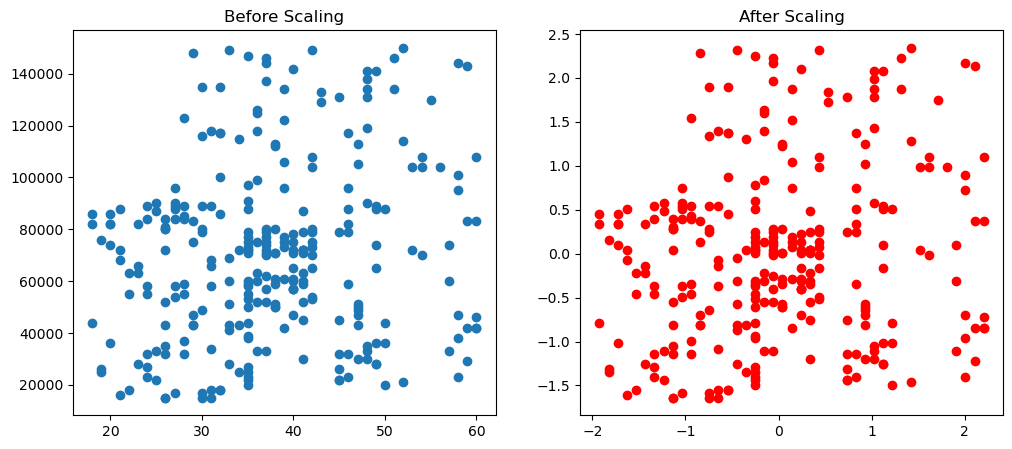

In [489]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

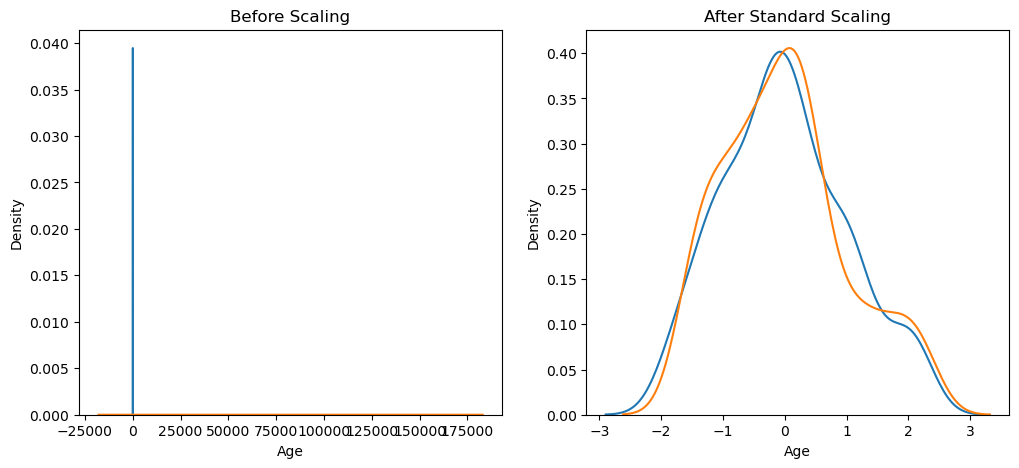

In [490]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

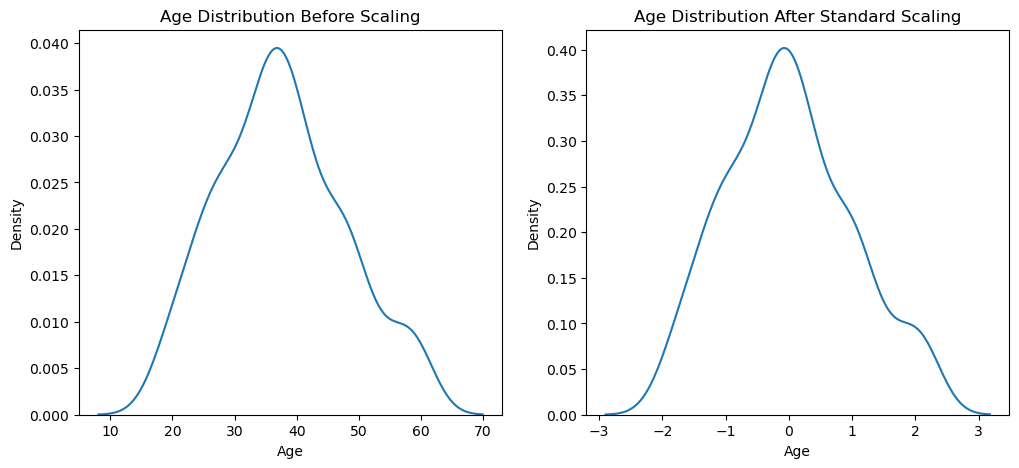

In [491]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

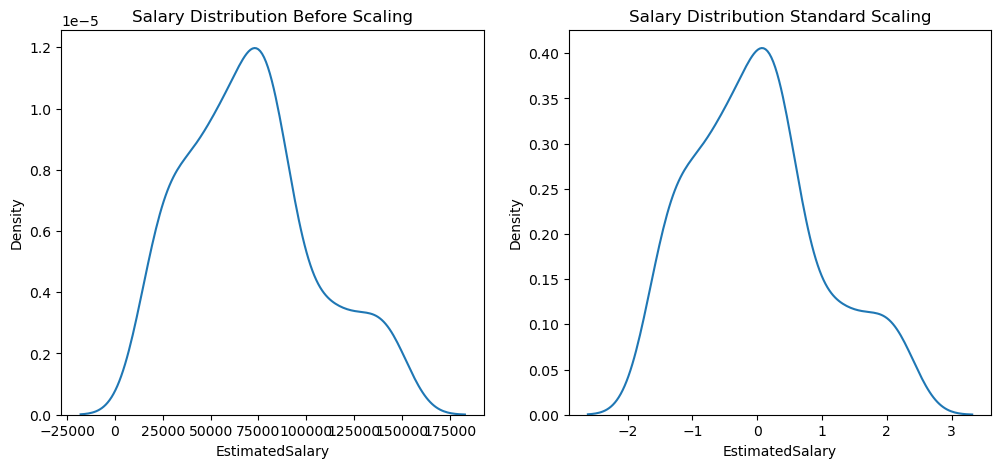

In [492]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [493]:
from sklearn.linear_model import LogisticRegression

In [494]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [495]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [496]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [497]:
from sklearn.metrics import accuracy_score

In [498]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.85
Scaled 0.85


In [499]:
from sklearn.tree import DecisionTreeClassifier

In [500]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [501]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [502]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [503]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8583333333333333
Scaled 0.8333333333333334


In [504]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [505]:
new_df = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})

In [506]:
dff = pd.concat([df,new_df],ignore_index=True)

In [507]:
dff.shape

(403, 5)

In [508]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


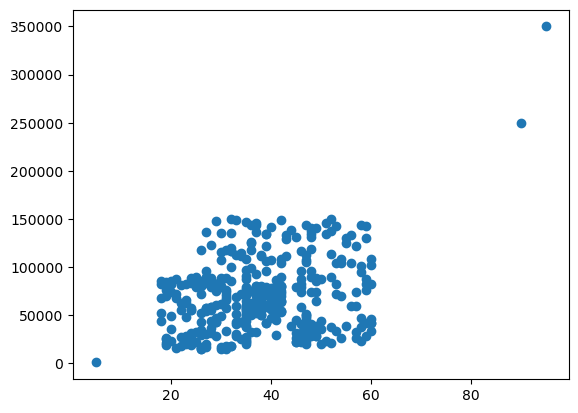

In [509]:
plt.scatter(dff['Age'], dff['EstimatedSalary'])

In [510]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dff.drop('Purchased', axis=1),
                                                    dff['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 4), (121, 4))

In [511]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler1.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Female'

In [512]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

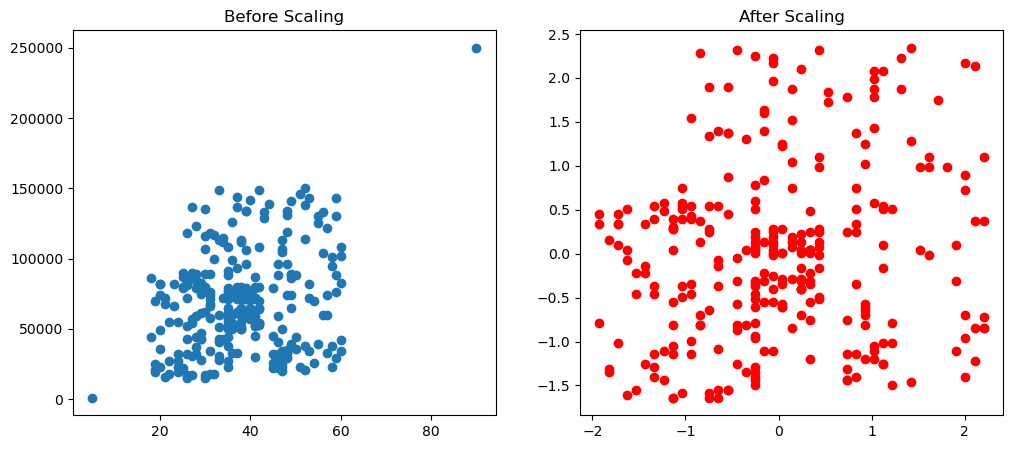

In [513]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()